In [1]:
import numpy as np
from sparseSampling import sparseSampling
from EISGame import EISGame
from valueIteration import valueIteration
from discretizer import discretizer
from EIS import SLModel
import pprint
import matplotlib.pyplot as plt
import copy

In [11]:
def sortedDictionary(dictionary):
    lists = sorted(dictionary.items()) # sorted by key, return a list of tuples
    x, y = zip(*lists) # unpack a list of pairs into two tuples
    return x,y

In [4]:
# Parameters
Rmax = 1.5
epsilon = 0.5
gamma = 0.3
stateRange = [-1,1]
numIntervals = 2000
C = 10
H = 3
EISIterations = 2
N0 = 200
# v.V

In [5]:
# Run Value Iteration
nValueIteration = 50
d = discretizer(stateRange,numIntervals)
g = EISGame()
v = valueIteration(G=g,stateRange=[-1,1],numInterval=numIntervals,C=C,gamma=gamma,discretizer=d)
vStore = [{}] * nValueIteration
for i in range(0,nValueIteration):
    v.nextIteration()
    vStore[i] = v.V

The starting state is 0.9247112201071415


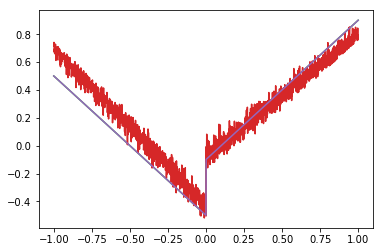

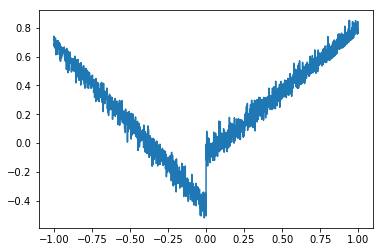

In [14]:
for i in range(0,nValueIteration,49):
    x,y = sortedDictionary(vStore[i])
    plt.plot(x,y)
    plt.show()

In [ ]:
# Building EIS
model = None
slModel = SLModel(d)
valueEIS = [{}] * EISIterations
for t in range(0,EISIterations): # run for t iterations
    g = EISGame() # Intialize a new game each round
    Nt = np.ceil(N0*(1.2)**(t)*np.log(N0*1.2**t))
    Nt = int(Nt)
    data = [(0,0)]*Nt
    for k in range(0,Nt): 
        Nt = N0
        s = sparseSampling(gamma=gamma,G = g,Rmax = Rmax, epsilon = epsilon,model = model ) # Explore
        s.H = H
        s.C = C
        sampledState =  np.random.uniform(-1,1)
        if sampledState <= 0: # Improve
            V = min(s.estimateQ(s.H,sampledState,turn=1)) # player 2
        else:
            V = max(s.estimateQ(s.H,sampledState, turn=0)) # player 1
        data[k]=(sampledState,V) # Generate Data
    model = slModel
    model.updateValues(data)
    print(t)
    valueEIS[t] = copy.deepcopy(model.V)
#     pprint.pprint(model.V)
    x,y = sortedDictionary(v.V)
    plt.scatter(x,y)
    plt.scatter(x,y,color='r',alpha=0.3)
    plt.text(0.3,-0.5, 'Red is expected plot \n as t -> infinity', bbox=dict(facecolor=None, alpha=0.5))    
    plt.xlabel("V*_Hat")
    plt.ylabel("V*_EIS")
    plt.xlim([-1,1.5])
    plt.ylim([-1,1.5])
    plt.title("ValueIteration_V* vs EIS_V* " + "Iteration Number: "+ str(t))
    plt.show()
    Nt = Nt*(1.2)**(t+1)*np.log(Nt*1.2**t)
    
    

The starting state is -0.32403652380472026


In [ ]:
## plot V(EIS)
for i in range(0,EISIterations):
    x,y = sortedDictionary(valueEIS[i])
    plt.plot(y,color='red')
    plt.plot(vStore[nValueIteration-1].values(),color='blue')
    plt.ylim([-1.5,1.5])
    plt.show()
## plot |V(EIS)-V^*|
# error = [0]*EISIterations
# for t in range(0,EISIterations):
#     error[t] = max(abs(valueEIS[t].values()-v.V.values())
# plt.plot(range(0,EISIterations), error)